In [1]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

max B(r=0): 1.874 G, max B(r=42.5mm) 3.226 G
max B(r=0): 1.860 G, max B(r=42.5mm) 3.261 G
max B(r=0): 1.841 G, max B(r=42.5mm) 3.243 G
max B(r=0): 1.818 G, max B(r=42.5mm) 3.239 G
max B(r=0): 1.800 G, max B(r=42.5mm) 3.203 G
max B(r=0): 1.761 G, max B(r=42.5mm) 3.172 G


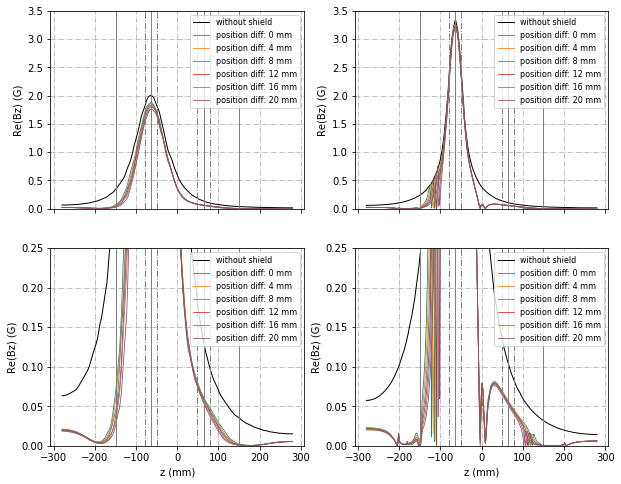

In [8]:
df0c =  pd.read_csv('data_RF/OuterShieldingPosition/NoShielding/Y=0mmPlotTangent.txt', comment='%', sep='\s+', names=['length', '|B|', 'ReB', 'ImB'])
df0off =  pd.read_csv('data_RF/OuterShieldingPosition/NoShielding/Y=42.5mmPlotTangent.txt', comment='%', sep='\s+',names=['length', '|B|', 'ReB', 'ImB'])

B_cm_list = []
B_cp_list = []
B_140_list = []
B_145_list = []
B_150_list = []


Bf_cm_list = []
Bf_cp_list = []
Bf_140_list = []
Bf_145_list = []
Bf_150_list = []


df0off['B_G'] = np.abs(df0off['ReB'])*1e4
df0off['z_mm'] = (df0off['length']-28)*10
df0c['B_G'] = np.abs(df0c['ReB'])*1e4
df0c['z_mm'] = (df0c['length']-28)*10

fig4, ax4 = plt.subplots(2,2, figsize=(10,8), sharex=True, )

ax4[0,0].plot(df0c['z_mm'], df0c['B_G'], lw=1, label='without shield', c='k')
ax4[1,0].plot(df0c['z_mm'], df0c['B_G'], lw=1, label='without shield', c='k')
ax4[0,1].plot(df0off['z_mm'], df0off['B_G'], lw=1, label='without shield', c='k')
ax4[1,1].plot(df0off['z_mm'], df0off['B_G'], lw=1, label='without shield', c='k')
for i in range(2):
    ax4[1,i].set_ylim(0, 0.25)
    ax4[0,i].set_ylim(0, 3.5)
    ax4[0,i].grid('both', ls='-.')
    ax4[1,i].grid('both', ls='-.')

# ls_list = [10*i for i in range(1, 6)]
ls_list = [2*i for i in range(0,11, 2)]
# ls_list = [5*i for i in range(2, 5)]
# ls_list = [5*i for i in range(0,2)]

for ls in ls_list:    
    
    df_i = pd.read_csv('data_RF/AlFlangeAlShieldCuShield/20mm+%dmmlength/Y=0mmPlotTangent.txt' %ls, comment='%', sep='\s+', names=['length', '|B|', 'ReB', 'ImB'])
    df_i['B_G'] = np.abs(df_i['ReB'])*1e4
    df_i['z_mm'] = (df_i['length']-28)*10

    df_ioff = pd.read_csv('data_RF/AlFlangeAlShieldCuShield/20mm+%dmmlength/Y=42.5mmPlotTangent.txt' %ls, comment='%', sep='\s+', names=['length', '|B|', 'ReB', 'ImB'])
    df_ioff['z_mm'] = (df_ioff['length']-28)*10
    df_ioff['B_G'] = np.abs(df_ioff['ReB'])*1e4


    B_cm_list.append(df_i['B_G'][216])
    B_cp_list.append(df_i['B_G'][343])
    B_140_list.append(df_i['B_G'][130])
    B_145_list.append(df_i['B_G'][135])
    B_150_list.append(df_i['B_G'][140])

    Bf_cm_list.append(df_ioff['B_G'][216])
    Bf_cp_list.append(df_ioff['B_G'][343])
    Bf_140_list.append(df_ioff['B_G'][130])
    Bf_145_list.append(df_ioff['B_G'][135])
    Bf_150_list.append(df_ioff['B_G'][140])



    ax4[0,0].plot(df_i['z_mm'], df_i['B_G'], lw=.8, label='position diff: %d mm' %ls)
    ax4[1,0].plot(df_i['z_mm'], df_i['B_G'], lw=.8, label='position diff: %d mm' %ls)
    ax4[0,1].plot(df_ioff['z_mm'], df_ioff['B_G'], lw=.8, label='position diff: %d mm' %ls)
    ax4[1,1].plot(df_ioff['z_mm'], df_ioff['B_G'], lw=.8, label='position diff: %d mm' %ls)

    print ("max B(r=0): %.3f G, max B(r=42.5mm) %.3f G" %( np.max(df_i['B_G']), np.max(df_ioff['B_G']) ))
for i in range(2):
    for j in range(2):
        ax4[i,j].legend(fontsize=8, loc='upper right')
        ax4[i,j].set_ylabel('Re(Bz) (G)')
        ax4[i,j].axvline(-64, lw=1, ls='-', color='gray')
        ax4[i,j].axvline(64, lw=1, ls='-', color='gray')
        ax4[i,j].axvline(-150, lw=1, ls='-', color='gray')
        ax4[i,j].axvline(150, lw=1, ls='-', color='gray')
        ax4[i,j].axvline(-64+15, lw=1, ls='-.', color='gray')
        ax4[i,j].axvline(-64-15, lw=1, ls='-.', color='gray')
        ax4[i,j].axvline(64+15, lw=1, ls='-.', color='gray')
        ax4[i,j].axvline(64-15, lw=1, ls='-.', color='gray')
        ax4[1,j].set_xlabel('z (mm)')
fig4.savefig('AlFlange_and_Cu_AAL_rings_result')